Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658% 

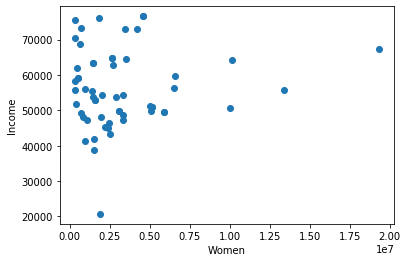

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

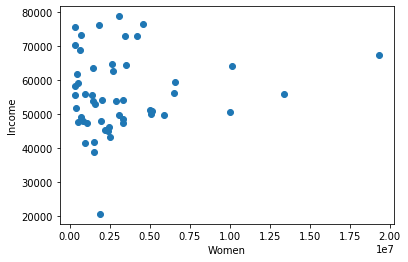

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
                   State  TotalPop   Hispanic      White      Black  \
0                Alabama   4830620   3.751616  61.878656  31.252976   
1                 Alaska    733375   5.909581  60.910180   2.848503   
2                Arizona   6641928  29.565921  57.120000   3.850987   
3               Arkansas   2958208   6.215474  71.137810  18.968759   
4             California  38421464  37.291875  40.215789   5.677396   
5               Colorado   5278906  20.784380  69.895572   3.546377   
7            Connecticut   3593222  15.604831  67.677053  10.348068   
8               Delaware    926454   8.824766  64.632710  20.743925   
9   District of Columbia    647484   9.165922  33.103911  51.776536   
10               Florida  19645772  21.338543  59.083749  15.165676   
11               Georgia  10006693   8.418242  54.286306  32.0

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stab

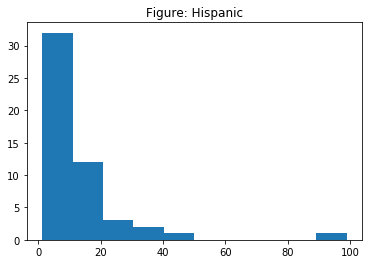

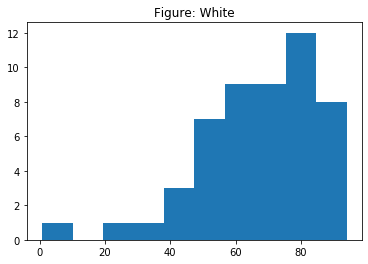

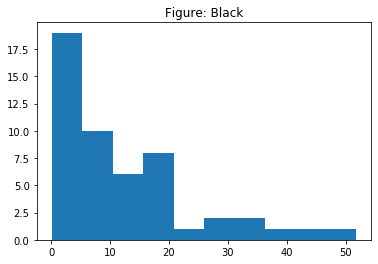

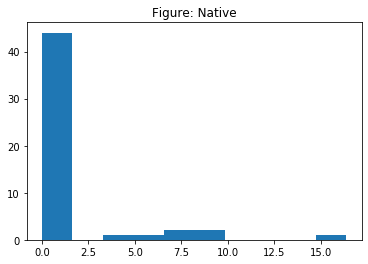

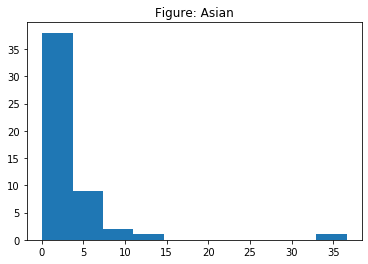

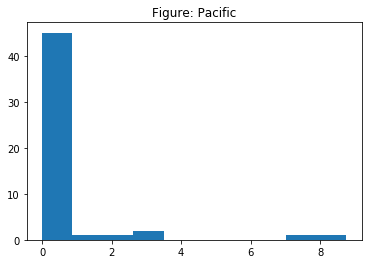

<Figure size 432x288 with 0 Axes>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

census_files=glob.glob('states*.csv')

df_list = []
for filename in census_files:
    data=pd.read_csv(filename)
    df_list.append(data)
us_census=pd.concat(df_list, ignore_index=True)
    

us_census.drop('Unnamed: 0', inplace=True, axis=1)
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

us_census['Income']=us_census['Income'].replace('[\$,]' , "" , regex= True )
us_census['Income']=pd.to_numeric(us_census.Income)
print(us_census.Income.head())

us_census['Men']=us_census['GenderPop'].str.split('(_)', expand=True)[0]
us_census['Women']=us_census['GenderPop'].str.split('(_)', expand=True)[2]
print(us_census.head())

us_census['Men']=us_census['Men'].replace('[M,]', "" , regex=True)
us_census['Women']=us_census['Women'].replace('[F,]', "" , regex=True)

us_census['Men']=pd.to_numeric(us_census.Men)
us_census['Women']=pd.to_numeric(us_census.Women)
print(us_census.head())

plt.scatter(us_census.Women , us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()
plt.clf()
print(us_census['Women'])

us_census['Women']=us_census['Women'].fillna(us_census.TotalPop - us_census.Men)
print(us_census['Women'])

print(us_census.duplicated())

clean_us_census = us_census.drop_duplicates()

plt.scatter(clean_us_census.Women , clean_us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show()
plt.clf()
print(clean_us_census.columns)

def clean_column(df,columns,string):
    for column in columns:
        df[column]=df[column].replace(string,"",regex=True)
        df[column]=pd.to_numeric(df[column])
    return df

columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
clean_us_census = clean_column(clean_us_census, columns, '[\%,]')
nan_pacific = 100 - clean_us_census.White - clean_us_census.Hispanic - clean_us_census.Black - clean_us_census.Asian
clean_us_census['Pacific'] = clean_us_census.Pacific.fillna(value=nan_pacific)

final_us_census = clean_us_census.drop_duplicates()
print(final_us_census)

def print_Histogram(df,columns):
    for column in columns:
        plt.hist(df[column])
        plt.title(('Figure: ' + column))
        plt.show()
        plt.clf()
        
columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

print_Histogram(final_us_census, columns)

